# Assignment 2: Clustering California Housing with K-means

### CS 4774 Machine Learning - Department of Computer Science - University of Virginia
"Tonight, more than 130,000 Californians will go to sleep homeless. That’s enough to fill Dodger Stadium, AT&T Park and Petco Park. The biggest culprit is rising housing costs. From 2000 to 2014, median rent in California increased by more than one-third, while real incomes for renters fell by 7 percent. Today, 1.5 million Californians spend more than half their income on housing. This crisis threatens not just low-income families but our entire economy, driving businesses to relocate to states in which their employees can afford to live. - **Business Insider, Sep 2018.**"

![Half of the homes in San Franciso is now one million or above](https://www.travelinusa.us/wp-content/uploads/sites/3/2017/11/Painted-Ladies-San-Francisco-01.jpg).

In this assignment, you will attempt to cluster the California Housing by implementing and analyzing the k-means algorithm to the data. K-Means is one of the most popular clustering algorithms. K-means stores k-centroids that it uses to define clusters. A point is considered to be in a particular cluster if it is closer to that cluster's centroid than any other centroid. For references, you may refer to my lecture on K-means or Chapter 2 of the textbook if you need additional sample codes to help with your assignment. For deliverables, you must write code in Python and submit this Jupyter Notebook file (.ipynb) to earn a total of 100 pts. You will gain points depending on how you perform in the following sections.

**Note**: In order for your assignment to be graded, you must save your Notebook filename under this format: **yourUvaUserId_assignment_2_kmeans.ipynb**.


---
## 1. PRE-PROCESSING THE DATA (10 pts)

Download the California Housing dataset from the below link. This dataset includes statistics about the median income, median age, average number of rooms per person, average number of persons in a household etc. The statistics were gathered per geographical block.

**Data Acquiring:** Download the dataset from https://www.kaggle.com/camnugent/california-housing-prices

**Data Discovery, Visualization, and Cleaning:** Fortunately, this step have been given to you from chapter 2. However, you should review them and write the code necessary for the purposes of this assignment.

In [241]:
# You might want to use the following package
from pandas.plotting import scatter_matrix # optional
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
import matplotlib.cm as cm
import matplotlib.patches as mpatches
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(42)

# Your code goes here for this section.

In [242]:
def loadHousingData():
  # The column names are adopted from the dataset page on Kaggle
  housing = pd.read_csv("data\\housing.csv")
  return housing

housing = loadHousingData()
housing.head(20)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [243]:
# Size information
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [244]:
# Number of row and cols
housing.shape

(20640, 10)

In [245]:
# Listing all categorical columns by filtering columns of type object
categorical_columns = housing.select_dtypes(include=['object']).columns
categorical_columns

Index(['ocean_proximity'], dtype='object')

In [246]:
# Listing all columns with numerical values by filtering columns of type int64 and float64
numerical_columns = housing.select_dtypes(include=['int64', 'float64']).columns
numerical_columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [247]:
# Create df that contains columnds with NaN values
missing_values = housing.isnull().sum()
columns_with_missing_values = missing_values[missing_values > 0]
columns_with_missing_values

total_bedrooms    207
dtype: int64

In [248]:
# Basic statistics for numerical columns
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


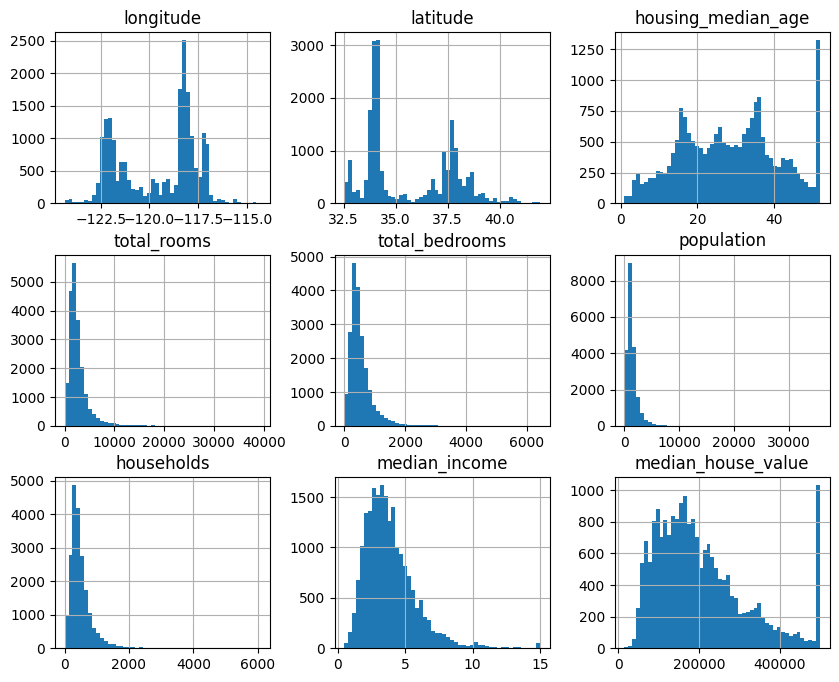

In [249]:
# Histogram for numerical columns
housing.hist(bins=50, figsize=(10,8))
plt.show()

<Axes: xlabel='longitude', ylabel='latitude'>

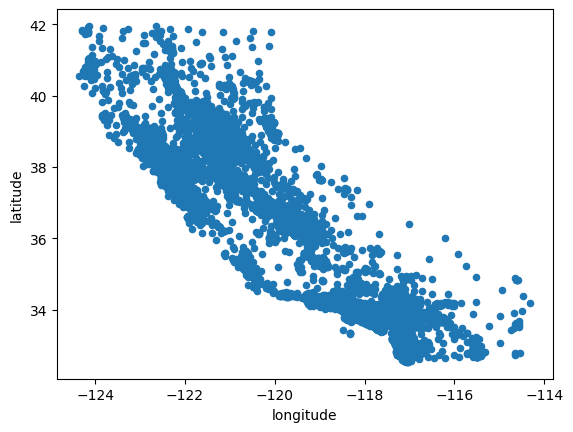

In [250]:
# Scatter plot for longitude and latitude
housing.plot(kind="scatter", x="longitude", y="latitude")

<Axes: xlabel='longitude', ylabel='latitude'>

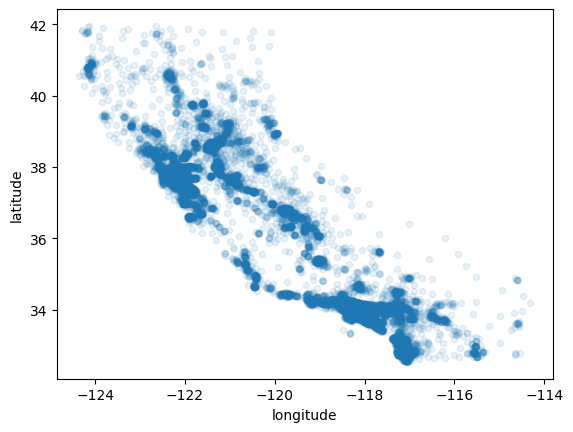

In [251]:
# Scatter plot for longitude and latitude with alpha to help visualize density
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

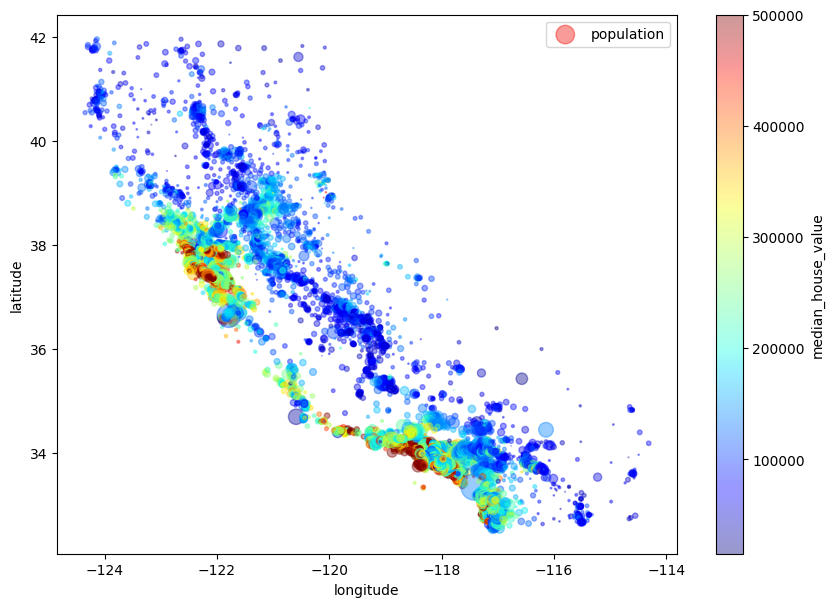

In [252]:
# Scatter plot for longitude and latitude with alpha and color based on median house value
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

In [253]:
# Correlation matrix
corr_matrix = housing.corr(numeric_only=True)
corr_matrix.shape
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [254]:
# Correlation matrix sorted in descending order
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

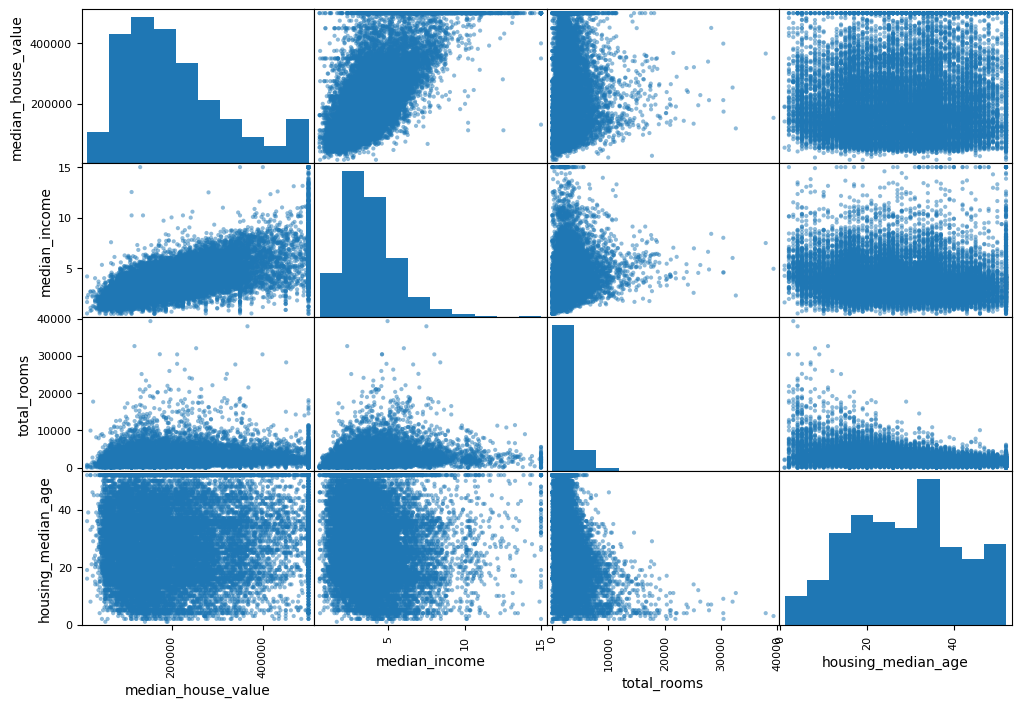

In [255]:
# Plotting correlation matrix
attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

In [256]:
# Pipeline
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, numerical_columns),
        ("cat", OneHotEncoder(), categorical_columns),
    ])

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared.shape

(20640, 14)

In [257]:
# Convert housing_prepared to a DataFrame
num_features = numerical_columns
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_features = cat_encoder.get_feature_names_out(categorical_columns)
all_features = list(num_features) + list(cat_features)
housing_prepared_df = pd.DataFrame(housing_prepared, columns=all_features)


housing_prepared_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.327835,1.052548,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,2.129631,0.0,0.0,0.0,1.0,0.0
1,-1.322844,1.043185,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,1.314156,0.0,0.0,0.0,1.0,0.0
2,-1.332827,1.038503,1.856182,-0.535746,-0.827024,-0.820777,-0.843637,1.782699,1.258693,0.0,0.0,0.0,1.0,0.0
3,-1.337818,1.038503,1.856182,-0.624215,-0.719723,-0.766028,-0.733781,0.932968,1.165100,0.0,0.0,0.0,1.0,0.0
4,-1.337818,1.038503,1.856182,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881,1.172900,0.0,0.0,0.0,1.0,0.0


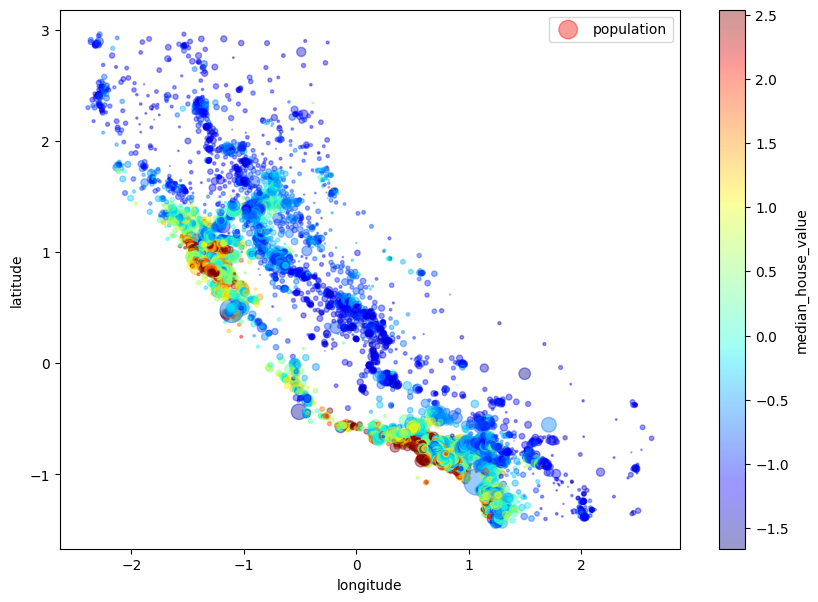

In [258]:
# Confirming the scatter plot is scaled
housing_prepared_df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

- - -
## 2. IMPLEMENTING K-MEANS (40 pts)

You must implement your own version of K-Means Algorithm. Input a cluster count K and M data points each with its own vector of N features, along with the choice of a distance measure; then:

1. Initialize K centroids. In our case, a centroid is just the average of all data in a cluster.
2. Assign each data point to the cluster that has the closest centroid base on a **distance measure** below.
3. After all data points have been assigned to clusters, recalculate the centroids for each cluster (as averages of all points in the cluster).
4. Repeat the data assignments and centroid calculations until no change in housing assignment occurs between iterations.

**Distance Measures:** Your implementation must include three distance metrics: Manhattan Distance, Euclidean Distance, Sup Distance. These 3 distance metrics can be generalized by the Minkovski Distance:
$D(\mathbf{x}, \mathbf{y}) = \left( \sum_{i=1}^n |x_i - y_i|^p \right)^{\frac{1}{p}}$ where $p=1$ for Mahattan, $p=2$ for Euclidean, and $p=\infty$ for Sup Distance.

**Implementation Notes:** Note that your functions should return distance measures; that is, the returned value should be high if the two vectors are dissimilar, low if they are similar, and zero if they are completely identical.

In [259]:
# Function: K Means
# -------------
# K-Means is an algorithm that takes in a dataset and a constant
# k and returns k centroids (which define clusters of data in the
# dataset which are similar to one another).

# Function: manhattan_distance
def manhattan_distance(x, y):
    return np.sum(np.abs(x - y))

# Function: euclidean_distance
def euclidean_distance(x, y):
    return np.sqrt(np.sum(np.square(x - y)))

# Function: sup_distance
def sup_distance(x, y):
    return np.max(np.abs(x - y))

# Initilize k amount of centers based on the dataset
def initialize_centers(df, k, dist_func):
    # Randomly choose centroids
    centers = [df.iloc[np.random.randint(0, len(df))].values]
    
    # Utilize probability distribution to choose the next centroids
    for _ in range(1, k):
        squared_distances = np.array([
            min(dist_func(point, center) ** 2 for center in centers) 
            for point in df.values
        ])
        
        probabilities = squared_distances / np.sum(squared_distances)
        
        next_centroid_index = np.random.choice(len(df), p=probabilities)
        centers.append(df.iloc[next_centroid_index].values)
    
    return np.array(centers)

# Reinitialize the center if there are no points in the cluster
def reinitialize_center(df):
    min_vals = df.min(axis=0)
    max_vals = df.max(axis=0)
    return np.random.uniform(min_vals, max_vals)

# Assign clusters based on the current centers
def assign_clusters(df, centers, dist_func):
    clusters = np.zeros(len(df))
    for i, point in enumerate(df.values):
        distances = np.array([dist_func(point, center) for center in centers])
        cluster = np.argmin(distances)
        clusters[i] = cluster
    return clusters

# Update the centers based on the new cluster assignments
def update_centers(df, clusters, k):
    new_centers = np.zeros((k, df.shape[1]))
    for center_index in range(k):
        if np.any(clusters == center_index):
            new_centers[center_index] = df[clusters == center_index].mean(axis=0)
        else:
            new_centers[center_index] = reinitialize_center(df)
    return new_centers

# Calculate the score based on the current clusters and centers
def get_score(df, clusters, centers, dist_func):
    score = 0
    for i, point in enumerate(df.values):
        center = centers[int(clusters[i])]
        score += (dist_func(point, center)) ** 2
    return score

# Calculate the standard deviation for each cluster
def calculate_cluster_std(df, clusters, k):
    std_per_cluster = {}
    for cluster_index in range(k):
        cluster_points = df[clusters == cluster_index]
        std_per_cluster[cluster_index] = cluster_points.std(axis=0)
    return std_per_cluster

# K Means algorithm
def k_means(df, k, p):
    # Choose distance function based on p
    if p == 1:
        dist_func = manhattan_distance
    elif p == 2:
        dist_func = euclidean_distance
    elif p == np.inf:
        dist_func = sup_distance

    # Initialize centers
    centers = initialize_centers(df, k, dist_func)
    iterations = 0
    
    while True:
        iterations += 1  
        # Assign clusters based on current centers
        clusters = assign_clusters(df, centers, dist_func)
        # Update centers based on new cluster assignments
        new_centers = update_centers(df, clusters, k)
        # If centers don't change, break
        if np.allclose(new_centers, centers):
            break

        centers = new_centers

    # Calculate final score and standard deviations
    score = get_score(df, clusters, centers, dist_func)
    std = calculate_cluster_std(df, clusters, k)

    return clusters, centers, score, std, iterations


- - -
## 3. CLUSTERING HOUSING INTO REGIONS (40 pts)

Now that you have implemented the K-Means as the clustering algorithm. Applying the algorithm for k=2 clusters to see if you can split California into a Northern and Southern regions.

* **Cluster the data:** Report the SSE (sum squared error), cluster means, within cluster standard deviations for each attribute, etc. Visualize the clustering by plot the latitude along the X axis and longitude along the Y axis. You should get a plot that looks roughly in the shape of California (see Chapter 2 for more details). Using the cluster means and std. deviations as representative values in the cluster, what can you say about the clusters that were found? How do they compare with what you know about cities and areas in California? What can you attribute the gaps to? It will definitely be helpful to have a map of California handy.

* **Change the number of clusters:** Increase the value of k from 2 to 3,4,..,10 and repeat the clustering process above. Record cluster means and standard deviations. When you change k, do any additional patterns emerge? If so, what are they? Applying the algorithm for 10 clusters to see if it clearly identified the silicon valley area as one cluster (where houses are relatively new and expensive, median income is high), the area of San Francisco as another etc. While SF and Silicon Valley may have a somewhat similar profile (at least, compared with mid CA), they were separated mainly due to the latitude/longtitue properties, that involve a dimension of geographical cohesiveness.

* **Plot the SSE over different number of cluster:** As referenced in the "elbow plot " in the lecture, you will reproduce the plot with different number of k, then determine which k produces a result that works best.



<<<<<<<<<<<<<<<<<<< K = 2 >>>>>>>>>>>>>>>>>>>

SSE:  155912.96730341978 

======= Cluster  1  =======

*** Center ***
 [0.1848448872922426, -0.17499203444255, -0.8762493696213745, 1.9314816521338047, 2.005906012940545, 1.8567159135485547, 2.0084019946626674, 0.16082391882658206, 0.14092422981026598, 0.4766666666666667, 0.32625, 0.0, 0.08208333333333333, 0.115] 

*** Standard Deviation ***
 [0.9827090498428953, 0.9234855693354662, 0.7365461002322568, 1.6592800154629184, 1.5133422467995066, 1.6433744477888785, 1.4879797076599375, 0.9429536784578795, 0.9337262860807712, 0.49955934451942663, 0.468937696893898, 0.0, 0.2745488423457706, 0.3190884265006114] 

*** Number of points ***
 2400 

======= Cluster  2  =======

*** Center ***
 [-0.02432169569635598, 0.023025267689808615, 0.11529596968702903, -0.25414232264918507, -0.2639350017027054, -0.24430472546691478, -0.2642634203503513, -0.021161041950865538, -0.018542661817138765, 0.4381578947368421, 0.3162280701754386, 0.00027412280701754384,

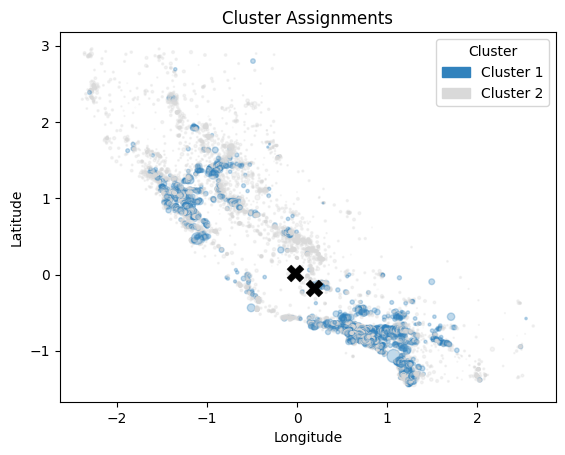

<<<<<<<<<<<<<<<<<<< K = 3 >>>>>>>>>>>>>>>>>>>

SSE:  122226.84049712571 

======= Cluster  1  =======

*** Center ***
 [-1.0348980716624898, 1.0690067512397083, 0.07477377593020311, -0.20763397688989418, -0.24314628267813668, -0.27898629442837314, -0.2491814397773002, -0.07395769788365633, -0.1313842545586258, 0.17218701422934354, 0.4735142891306947, 0.0, 0.25732392682051897, 0.09697476981944278] 

*** Standard Deviation ***
 [0.49343837858244166, 0.4733136736310709, 1.0422171477794278, 0.5202140322520122, 0.5346970775132671, 0.5303296777150777, 0.5519837959244304, 0.9799544069664392, 1.0249677626137013, 0.37756548088967684, 0.4993278686223877, 0.0, 0.4371855188429067, 0.295941102742296] 

*** Number of points ***
 8363 

======= Cluster  2  =======

*** Center ***
 [0.7856649815447536, -0.8163142853640522, 0.09301862279236982, -0.21450881543624623, -0.19626248952815858, -0.13856072567944844, -0.19112439043010243, 0.027726420170773022, 0.08108063931325457, 0.6529011529011529, 0.1885276

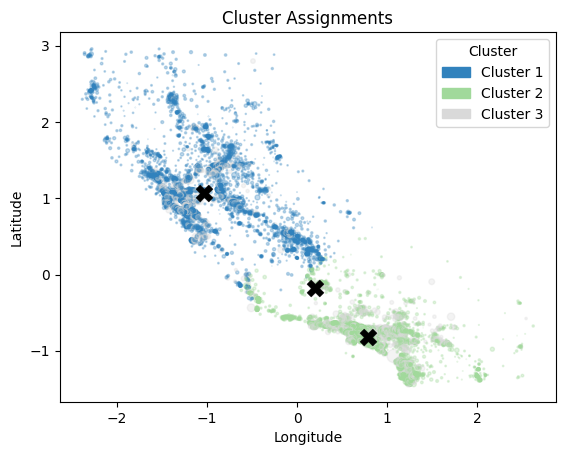

<<<<<<<<<<<<<<<<<<< K = 4 >>>>>>>>>>>>>>>>>>>

SSE:  107067.7488521859 

======= Cluster  1  =======

*** Center ***
 [0.1885570420179807, -0.16001225884151196, -0.9749781014748792, 2.4718716516452757, 2.550476896824094, 2.362493518525325, 2.5495728397360256, 0.13517934940366297, 0.07535858219455215, 0.4615885416666667, 0.359375, 0.0, 0.083984375, 0.09505208333333333] 

*** Standard Deviation ***
 [0.9828761862278736, 0.9162421119142742, 0.707759289868957, 1.8332224704247062, 1.636437010635943, 1.8271976996619204, 1.6060941416643812, 0.8426139846506919, 0.8607804413892464, 0.4986847351979359, 0.47997353347229077, 0.0, 0.27745471282897644, 0.29338238195443755] 

*** Number of points ***
 1536 

======= Cluster  2  =======

*** Center ***
 [-0.016411451912535766, -0.20615821945563406, 0.09655705743825975, 0.04773361633158502, -0.20577952317937637, -0.26391187348967365, -0.1839836530532234, 1.533627376968036, 1.7198574733894894, 0.6102080624187256, 0.06079323797139142, 0.00032509752925877

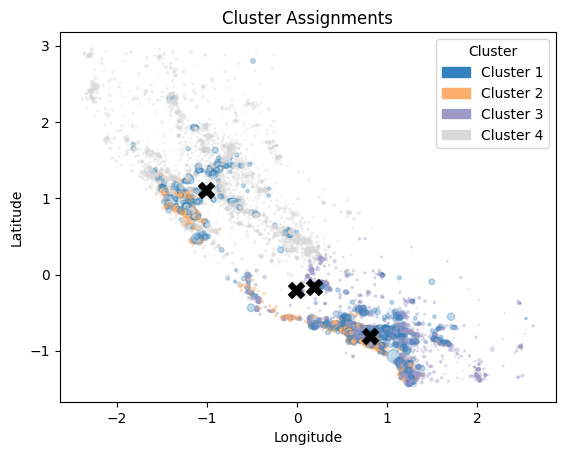

<<<<<<<<<<<<<<<<<<< K = 5 >>>>>>>>>>>>>>>>>>>

SSE:  94857.054235762 

======= Cluster  1  =======

*** Center ***
 [0.17958704378101736, -0.18525716384378654, -0.7987829857693619, 1.27226865129717, 1.4013018247571343, 1.286053976096265, 1.4125781691438697, 0.026534532255291957, 0.04693498594315971, 0.48610582413399317, 0.3189950513894176, 0.0, 0.07651313285116101, 0.11838599162542825] 

*** Standard Deviation ***
 [0.957736779647509, 0.8891401490865866, 0.7310478830194521, 0.8077135894185241, 0.7712329037563074, 0.8067364395664579, 0.7428354628515348, 0.7931919179365005, 0.8375212165212328, 0.4999020706005756, 0.46617586176875037, 0.0, 0.26586797619882047, 0.32312612670050467] 

*** Number of points ***
 2627 

======= Cluster  2  =======

*** Center ***
 [-1.0082605382071839, 1.1108534540058252, 0.09773264312788171, -0.2992541889611505, -0.3056038198812414, -0.33501519307393957, -0.31995906024487236, -0.33720756454606327, -0.42488282885891143, 0.14160711681493365, 0.5401779203733411,

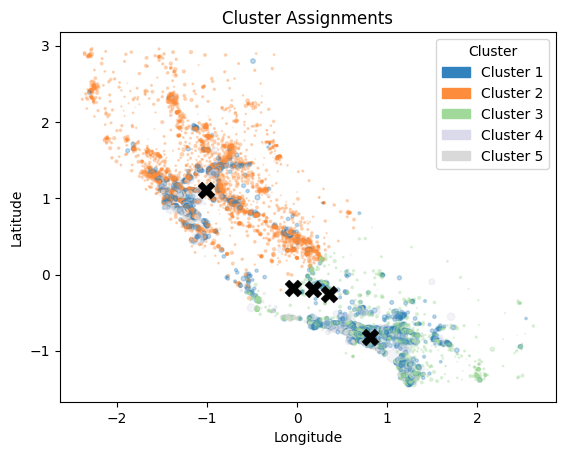

<<<<<<<<<<<<<<<<<<< K = 6 >>>>>>>>>>>>>>>>>>>

SSE:  87382.91655451883 

======= Cluster  1  =======

*** Center ***
 [0.5051018495022149, -0.6548153153333361, -0.036335114756967574, -0.008878634251350652, -0.2734135235167495, -0.3051718208043725, -0.25544277428180145, 1.6125788953907207, 1.6342874540563133, 0.7313182199832073, 0.07220822837951302, 0.0, 0.02225020990764064, 0.17422334172963896] 

*** Standard Deviation ***
 [0.6433704151159431, 0.5314172277549084, 0.9966821855914004, 0.5846878224507884, 0.47873140135458464, 0.4606328906312467, 0.48982815619978093, 1.2722282124755293, 0.796719757692496, 0.4433671233226087, 0.25888672645603383, 0.0, 0.1475272010239301, 0.3793810656011515] 

*** Number of points ***
 2382 

======= Cluster  2  =======

*** Center ***
 [0.3676426015140386, -0.2795279428370658, -1.3276514873355423, 5.356177503541711, 5.191002407488631, 5.001424003314223, 5.155638665245238, 0.3105851587974932, 0.07580941251427747, 0.40145985401459855, 0.44525547445255476, 0.

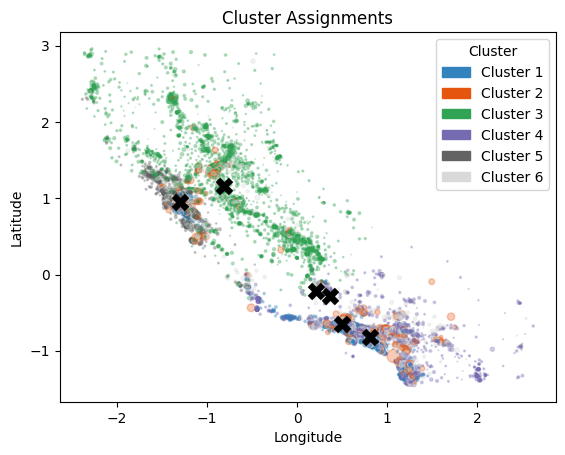

<<<<<<<<<<<<<<<<<<< K = 7 >>>>>>>>>>>>>>>>>>>

SSE:  81291.72921810676 

======= Cluster  1  =======

*** Center ***
 [0.8290872902549932, -0.8147230409798957, -0.5582493304188304, 0.24786124758131672, 0.3738293129575212, 0.4079801143927816, 0.37356537495709197, -0.19155927132852424, -0.20170317866500256, 0.5527950310559007, 0.2648221343873518, 0.0, 0.0, 0.18238283455674761] 

*** Standard Deviation ***
 [0.43366814379283297, 0.3340760025714703, 0.7428473220602353, 0.4482918410387145, 0.48277763963102527, 0.5866676178388116, 0.467076575701209, 0.6427444107301722, 0.630011760718755, 0.49727507384339603, 0.4413007518199011, 0.0, 0.0, 0.38621425197157694] 

*** Number of points ***
 3542 

======= Cluster  2  =======

*** Center ***
 [-0.8154934655939788, 1.1739331200321346, -0.2920940343350976, -0.2972621881483749, -0.30387201023130606, -0.32931749925953674, -0.3347257752973597, -0.5334047519337053, -0.8257119464341872, 0.07697456492637215, 0.8277554663096832, 0.0, 0.0642570281124498, 0.

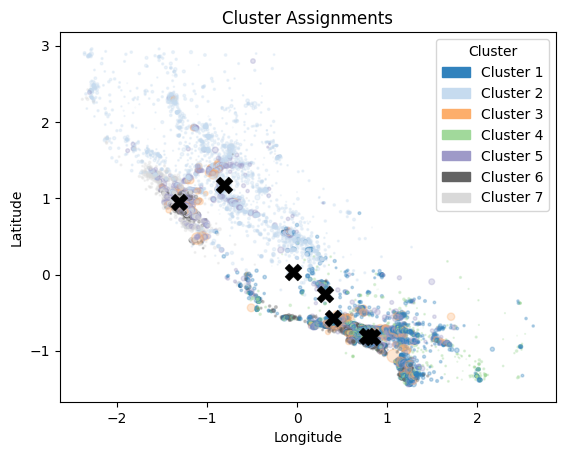

<<<<<<<<<<<<<<<<<<< K = 8 >>>>>>>>>>>>>>>>>>>

SSE:  78079.77520425008 

======= Cluster  1  =======

*** Center ***
 [-0.7159525227188268, 1.10692240991171, -0.556676463589537, -0.32828344874054466, -0.34954265156257364, -0.3679598673592011, -0.38746837085493363, -0.47815963522233756, -0.8118853989843913, 0.07919655667144906, 0.8599713055954089, 0.0, 0.03385939741750359, 0.02697274031563845] 

*** Standard Deviation ***
 [0.5832951450248637, 0.6344853109330343, 0.6748864633643042, 0.39090258231661, 0.40507105391346065, 0.4346702899409941, 0.41450709964598975, 0.5851074677252102, 0.4276444815847807, 0.27008404863880325, 0.3470665974377134, 0.0, 0.1808931400060382, 0.16202698745663888] 

*** Number of points ***
 3485 

======= Cluster  2  =======

*** Center ***
 [0.8505559531461369, -0.8228203040763057, -0.6850657167023747, 0.8268896786232439, 1.019885283672666, 0.9846902525903354, 1.0121764814879084, -0.12583517728746504, -0.07598061809153002, 0.5914911193721603, 0.26394052044609667,

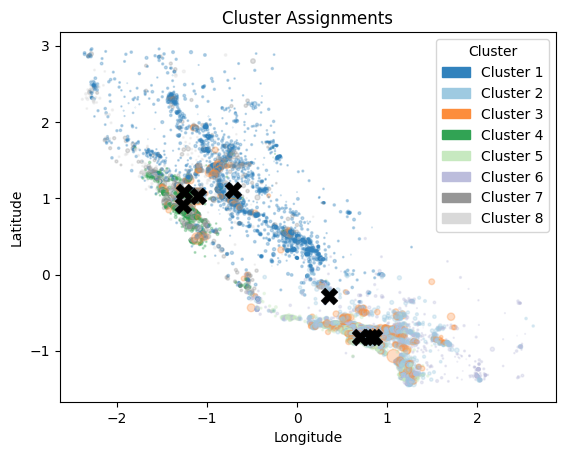

<<<<<<<<<<<<<<<<<<< K = 9 >>>>>>>>>>>>>>>>>>>

SSE:  72626.1911804402 

======= Cluster  1  =======

*** Center ***
 [0.26713602835738065, -0.24630619926269598, -0.9334515752702018, 2.1729831835593116, 2.318707643949375, 2.0830675996360104, 2.3013619473487568, 0.12784745494326918, 0.12012582048407126, 0.4789272030651341, 0.3524904214559387, 0.0, 0.07183908045977011, 0.09674329501915709] 

*** Standard Deviation ***
 [0.9330381572333606, 0.868397466202909, 0.7159000595016946, 0.923383529612997, 0.836849819021742, 0.9174982705493512, 0.7687840073323434, 0.8711117703184329, 0.9105020136335296, 0.4997951627084461, 0.4779746388890387, 0.0, 0.25834503333120323, 0.2957495753445091] 

*** Number of points ***
 1044 

======= Cluster  2  =======

*** Center ***
 [-0.740206643326342, 1.1449113846351393, -0.22814834779262677, -0.4461649413128308, -0.45721647679953104, -0.47473140674664077, -0.4954067945592484, -0.5841895604182528, -0.8813340745394913, 0.05625, 0.8801136363636364, 0.0, 0.038920454

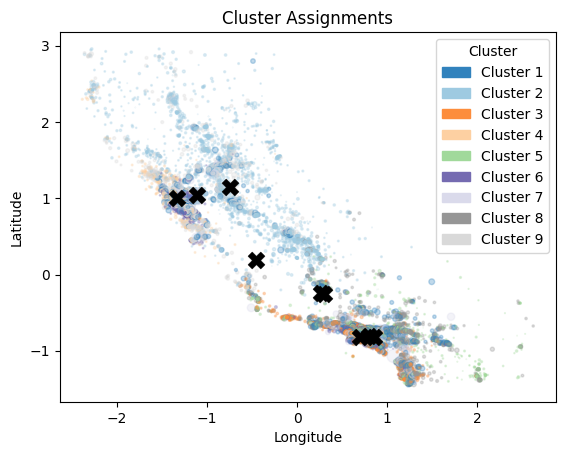

<<<<<<<<<<<<<<<<<<< K = 10 >>>>>>>>>>>>>>>>>>>

SSE:  68977.92554411705 

======= Cluster  1  =======

*** Center ***
 [0.7137030050472049, -0.7768042840924954, 0.7890302732887143, -0.4864826404857881, -0.43198757791402725, -0.3024926078845641, -0.4197656953140011, -0.3564361355574686, -0.24345118367911253, 0.7589755316716214, 0.12805854104733594, 0.000914703864623828, 0.0, 0.11205122341641893] 

*** Standard Deviation ***
 [0.2742844571763771, 0.21711969748375912, 0.5107573414824043, 0.3003421965281525, 0.3468972524423062, 0.4244217911269709, 0.35437150869475625, 0.5852350316280087, 0.5978926850304359, 0.4277540363817403, 0.3341931938388475, 0.030233693269662583, 0.0, 0.3154655357363298] 

*** Number of points ***
 4373 

======= Cluster  2  =======

*** Center ***
 [-1.2898226389007776, 1.066781402032635, 1.2045343490566798, -0.4224187614344978, -0.3899791458034782, -0.4388553167748231, -0.3874415095788348, -0.3616714312212679, -0.10498740440471528, 0.14612676056338028, 0.17165492957

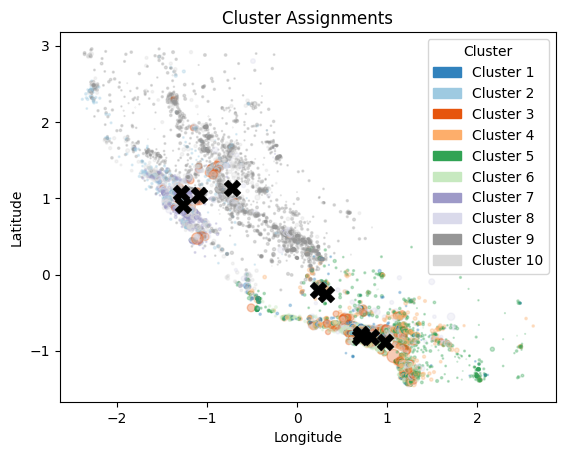

In [260]:
inertia_values = []

# Run K Means for k = 2 to 10
for k in range(2, 11):
    best_clusters, best_centers, score, std,  iterations = k_means(housing_prepared_df, k, p = 2)
    print("<<<<<<<<<<<<<<<<<<< K =", k, ">>>>>>>>>>>>>>>>>>>\n")
    print("SSE: ", score, "\n")
    inertia_values.append(score)
    for i in range(len(best_centers)):
        print("======= Cluster ", i + 1, " =======\n")
        print("*** Center ***\n", best_centers[i].tolist(), "\n")
        print("*** Standard Deviation ***\n", std[i].tolist(), "\n")
        print("*** Number of points ***\n", len(best_clusters[best_clusters == i]), "\n")
    scatter = plt.scatter(housing_prepared_df["longitude"], housing_prepared_df["latitude"], c=best_clusters, cmap = 'tab20c', marker='.', alpha=0.3, s=housing["population"]/100)
    plt.scatter(best_centers[:, 0], best_centers[:, 1], 
                c='black', marker='X', s=150, linewidths=0.3)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title("Cluster Assignments")
    unique_clusters = np.unique(best_clusters)  
    handles = []
    for cluster in unique_clusters:
        color = plt.cm.tab20c(cluster / max(unique_clusters))  
        handles.append(mpatches.Patch(color=color, label=f'Cluster {int(cluster + 1)}'))
    plt.legend(handles=handles, title='Cluster')

    plt.show()
        


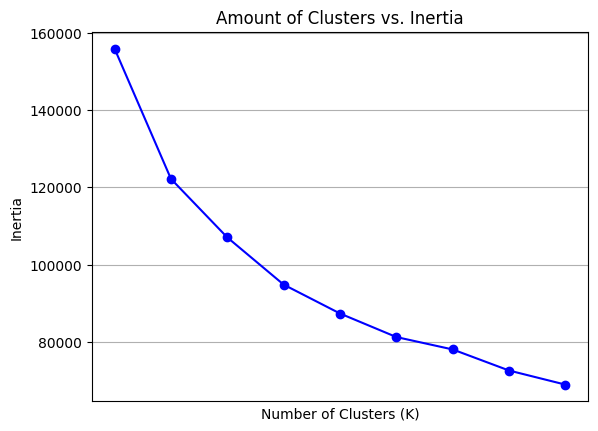

In [261]:
# Plot the Elbow graph
plt.plot(range(2, 11), inertia_values, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Amount of Clusters vs. Inertia')
plt.xticks(range(12, 3))
plt.grid(True)
plt.show()

Question 3 Part 1

When k = 2, the clusters that were found would sometimes split the north and south geographically while sometimes, it would not. The times that it would not evenly split geographically, one clusters would represent housing that had higher median price + attributes that would contribute to this while the other group represented housing with lower median pricing + attributes that would contribute to this. This is made evident because one cluster would be heavily concentrated around the SF and LA area where housing prices are much higher than other areas of California. This makes sense because there are 14 different attributes and depending on the randomized centroids, the data points may form different partitions with more emphasis on different attributes. We are representing 14 dimensional space in 2 dimensional space so it will not always split by longitude and latitude. The standard deviation when there are only two clusters is high because there are very few clusters while there is a lot of housing data so it is difficult to find centroids that represent two groups well. The gaps in the graph where there are no data points most likely represent areas in California that almost no people reside in or there is no available data on that areas population.

Question 3 Part 2

When the amount of clusters increase, the clusters become more split geographically and a new large cluster appears in the Central Valley. As k approaches 10, it is possible to identify more specific cities within the large regions, for example, when k was only 2, it was only possible to identify that the general area of SF and LA had a high concentration of people and high housing prices. However, when k = 10, it is possible to identify specific cities such as Santa Barbara vs LA and Silicon Valley vs SF and different parts within Central Valley that have similar median housing prices and attributes. As the number of clusters increase the algorithm begins to capture more fine-grained divisions within these larger regions. The standard deviation within each cluster also decreases reflecting more homogeneity within each cluster.

Question 3 Part 3

From the elbow plot, I have determined that k = 5 would be the most optimal amount of clusters because it will provide the best balance between intertia and over-fitting / training time

- - -
## 4. WRITING ON THE INTUITION FOR THE CALIFORNIA HOUSING CRISIS (10 pts)

This question is a qualitative one, and is intended to let you experiment with a real world clustering task. Hopefully it gives you some intuition as for how the preset number of clusters affects the clustering results. Too few clusters may not reveal the information that is in the data. Too many clusters may hurt data analysis as well, as it may not generalize (and in this sense, it is equivalent to over fitting).

Write at least one paragraph to demonstrate your intuition on the California Housing Crisis. You might also want to mention some possible solutions to solve it. You will receive credits based upon your insights and intuitions on this challenge.



From the clustering that I have performed, I have learned that there are three large regions of high concentration of people and similar housing attributes. Two of these regions, the SF and LA region, contain many cities that have high concentration of people and have have a high median housing price. These two regions likely have the highest rate of homelessness as they have the highest concentration of people while have having the highest median housing prices. While the third region, Central Valley, doesn’t have as high of a median housing price, it still has a substantial concentration of people and is important to consider when fighting homelessness. The first step to solving the the California Housing Crisis would be to funnel more resources into the SF and LA regions by increasing the availability of affordable housing and expanding social services for those experiencing homelessness. These areas, with their high median housing prices and dense populations, require urgent interventions, such as expanding rent control and incentivizing the development of affordable units to reduce the costs and time associated with new housing projects. Additionally, targeting the Central Valley region, where housing is more affordable but still faces a growing population, could help alleviate the pressure on SF and LA. By improving infrastructure and public transportation connections between the Central Valley and major job hubs, more people could live in affordable areas while commuting to higher-paying jobs in the cities. As mentioned before, there are gaps between the large clusters indicating areas that a smaller number of people live in or areas that have low population density. It could be beneficial to explore opportunities to build affordable housing near those areas of concern and potentially expand infrastructure to make these areas more accessible to job centers. By building affordable housing near the gaps, in regions that are currently underdeveloped but have the potential for growth, California could provide more housing options for people who cannot afford to live in SF and LA.

- - -
### NEED HELP?

In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my lectures and/or the textbook
 * Talk to the TA, they are available and there to help you during their OH.
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS4774 Assignment 2:...".

Best of luck and have fun!